# Survival rate Montreal businesses

## Import libraries

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Import

In [156]:
df = pd.read_csv('informe_les_commercants.csv')

In [157]:
df.head(5)

,ID Réponse,Date,Phase,Type de territoire,Arrondissement / Ville liée,Statut du commerce,Enjeux: Soutien financier?,Enjeux: Maintien des opérations?,Enjeux: Fiscalité (taxes et impôts)?,Enjeux: Ressources humaines?,...,Présence sur LinkedIn?,Faites-vous de la vente en ligne?,Canal de vente en ligne,Connaissez-vous le service de livraison urbaine?,Êtes-vous intéressé par le service de livraison urbaine?,Intérêt pour le programme d'accompagnement pour le virage numérique des entreprises?,Offrez-vous un service de livraison?,Êtes-vous satisfait de votre service de livraison actuel?,Seriez-vous intéressé par le service de livraison urbain (à vélo) mise en place par la Ville de Montréal et ses partenaires si vous si aviez accès?,Est-ce que l'information que nous vous avons donnée vous a été utile?
0,1,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Ouvert,NaN,Oui,NaN,Oui,...,NaN,Non,Pas de vente en ligne,Sans réponse,Sans réponse,"Non, je n'ai pas d'intérêt à faire un virage n...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Non
1,2,2020-05-12,1,Arrondissement,Outremont,Partiellement ouvert,Oui,NaN,NaN,NaN,...,NaN,Non,Pas de vente en ligne,Non,Oui,"Non, je n'ai pas d'intérêt à faire un virage n...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui
2,3,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Ouvert,NaN,NaN,NaN,Oui,...,NaN,Oui,Site transactionnel,Oui,Non,"Non, j'ai déjà ce qu'il me faut pour faire un ...",Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui
3,4,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Fermé,Oui,NaN,NaN,NaN,...,NaN,Non,Pas de vente en ligne,Oui,Non,Je ne sais pas,Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui
4,5,2020-05-12,1,Arrondissement,Le Plateau-Mont-Royal,Statut inconnu,Oui,Oui,NaN,NaN,...,NaN,Oui,Site transactionnel,Non,Oui,Oui,Question non posée lors de l'appel,Question non posée lors de l'appel,Question non posée lors de l'appel,Oui


In [158]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 32 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   ID Réponse                                                                                                                                           1896 non-null   int64 
 1   Date                                                                                                                                                 1896 non-null   object
 2   Phase                                                                                                                                                1896 non-null   int64 
 3   Typ

## Data Cleaning

### Rename columns & variables selection

In [159]:
# Rename columns
rename = {"Arrondissement / Ville liée": "Location", "Statut du commerce": "Operation_status", 
         "Enjeux: Soutien financier?": "Challenge_financial_support", 
         "Enjeux: Maintien des opérations?": "Challenge_maintain_ops", 
         "Enjeux: Fiscalité (taxes et impôts)?": "Challenge_taxes", 
         "Enjeux: Ressources humaines?": "Challenge_HR", 
         "Enjeux: Réglementation?": "Challenge_regulation", 
         "Enjeux: Marketing?": "Challenge_marketing", 
         "Enjeux: Santé et sécurité?": "Challenge_security_health", 
         "Enjeux: Recherche d'équipement sanitaire?": "Challenge_sanitary_equip", 
         "Enjeux: Aménagement de l'espace?": "Challenge_space_management", 
         "Enjeux: Permis pour les terrasses extérieures?": "Challenge_terasse_permit", 
         "Enjeux: Autre?": "Other_challenges", 
         "Présence sur les médias sociaux?": "Social_media_pressence",
          "Présence sur Facebook?" : "Facebook", 
          "Présence sur Twitter?": "Twitter", 
          "Présence sur Instagram?": "Instagram", 
          "Présence sur LinkedIn?": "Linkedin", 
          "Faites-vous de la vente en ligne?": "Online_businesses", 
          "Canal de vente en ligne": "Channel_online_business", 
          "Offrez-vous un service de livraison?": "Delivery_service_offer", 
          "Êtes-vous satisfait de votre service de livraison actuel?": "Satisfaction_current_delivery_service"
         }

df = df.rename(columns = rename)

In [160]:
df.columns

Index(['ID Réponse', 'Date', 'Phase', 'Type de territoire', 'Location',
       'Operation_status', 'Challenge_financial_support',
       'Challenge_maintain_ops', 'Challenge_taxes', 'Challenge_HR',
       'Challenge_regulation', 'Challenge_marketing',
       'Challenge_security_health', 'Challenge_sanitary_equip',
       'Challenge_space_management', 'Challenge_terasse_permit',
       'Other_challenges', 'Intérêt pour le programme d'aide d'urgence?',
       'Social_media_pressence', 'Facebook', 'Twitter', 'Instagram',
       'Linkedin', 'Online_businesses', 'Channel_online_business',
       'Connaissez-vous le service de livraison urbaine?',
       'Êtes-vous intéressé par le service de livraison urbaine?',
       'Intérêt pour le programme d'accompagnement pour le virage numérique des entreprises?',
       'Delivery_service_offer', 'Satisfaction_current_delivery_service',
       'Seriez-vous intéressé par le service de livraison urbain (à vélo) mise en place par la Ville de Montréal e

In [161]:
# Preliminary variables selection: Remove variables not relevant to the analysis
drop_columns = ['Type de territoire', "Intérêt pour le programme d'aide d'urgence?", 
               'Connaissez-vous le service de livraison urbaine?', 'Êtes-vous intéressé par le service de livraison urbaine?',
               "Intérêt pour le programme d'accompagnement pour le virage numérique des entreprises?", 
               'Seriez-vous intéressé par le service de livraison urbain (à vélo) mise en place par la Ville de Montréal et ses partenaires si vous si aviez accès?', 
               "Est-ce que l'information que nous vous avons donnée vous a été utile?"]

In [162]:
df = df.drop(drop_columns, axis=1)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   ID Réponse                             1896 non-null   int64 
 1   Date                                   1896 non-null   object
 2   Phase                                  1896 non-null   int64 
 3   Location                               1347 non-null   object
 4   Operation_status                       1896 non-null   object
 5   Challenge_financial_support            928 non-null    object
 6   Challenge_maintain_ops                 167 non-null    object
 7   Challenge_taxes                        89 non-null     object
 8   Challenge_HR                           149 non-null    object
 9   Challenge_regulation                   82 non-null     object
 10  Challenge_marketing                    266 non-null    object
 11  Challenge_securit

### Date column transformation

In [164]:
def string_to_date(row):
    row['Date'] = datetime.strptime(row['Date'], '%Y-%m-%d')
    return row

df = df.apply(string_to_date, axis=1)

### Missing data

In [165]:
for i in df.columns: 
    if df[i].count() < 1896:
        print(i)
        print(df[i].unique())

Location
['Le Plateau-Mont-Royal' 'Outremont' 'Côte-des-Neiges-Notre-Dame-de-Grâce'
 'Ahuntsic-Cartierville' 'Rosemont-La Petite-Patrie'
 'Villeray-Saint-Michel-Parc-Extension' 'Verdun' nan 'Le Sud-Ouest'
 'Westmount' 'Mont-Royal' 'Saint-Laurent' 'Montréal-Nord' 'Saint-Léonard'
 'Rivière-des-Prairies-Pointe-aux-Trembles' 'Ville-Marie'
 'Mercier-Hochelaga-Maisonneuve' 'Kirkland' 'Pierrefonds-Roxboro'
 'LaSalle' 'Dollard-des-Ormeaux' 'Anjou' 'Pointe-Claire' 'Montréal-Ouest'
 'Beaconsfield' 'Dorval' "L'Île-Bizard-Sainte-Geneviève" 'Lachine'
 'Île-Bizard-Sainte-Geneviève']
Challenge_financial_support
[nan 'Oui']
Challenge_maintain_ops
['Oui' nan]
Challenge_taxes
[nan 'Oui']
Challenge_HR
['Oui' nan]
Challenge_regulation
[nan 'Oui']
Challenge_marketing
[nan 'Oui']
Challenge_security_health
[nan 'Oui']
Challenge_sanitary_equip
[nan 'Oui']
Challenge_space_management
[nan 'Oui']
Challenge_terasse_permit
[nan 'Oui']
Other_challenges
['Oui' nan]
Facebook
[nan 'Oui']
Twitter
[nan 'Oui']
Instagram


Noted that Location has 28% missing values. In addition, the missing values in other columns marked as 'nan' are considered "No" answer as the unique values of the columns is "Oui" (Yes) and 'nan'. 

Proposed solution: 
- Location is a critical variable in the analysis. Retain the dataset with missing values, and retain the data set with missing values in the Location variable removed for analysis. 
- All other columns with 'nan' values will be regarded as 'No' in answer.

In [166]:
nan_columns=['Challenge_financial_support', 'Challenge_maintain_ops', 
                        'Challenge_taxes', 'Challenge_HR', 'Challenge_regulation', 
                        'Challenge_marketing', 'Challenge_security_health', 
                        'Challenge_sanitary_equip', 'Challenge_space_management',
                        'Challenge_terasse_permit', 'Other_challenges','Facebook', 'Twitter',
                        'Instagram', 'Linkedin']
nan_dict = {i: 'No' for i in nan_columns}
df = df.fillna(value=nan_dict)

In [167]:
df_with_loc = df.copy()
df_drop_loc = df.copy().drop(columns=['Location'])

## Data Exploration

In [168]:
df_with_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   ID Réponse                             1896 non-null   int64         
 1   Date                                   1896 non-null   datetime64[ns]
 2   Phase                                  1896 non-null   int64         
 3   Location                               1347 non-null   object        
 4   Operation_status                       1896 non-null   object        
 5   Challenge_financial_support            1896 non-null   object        
 6   Challenge_maintain_ops                 1896 non-null   object        
 7   Challenge_taxes                        1896 non-null   object        
 8   Challenge_HR                           1896 non-null   object        
 9   Challenge_regulation                   1896 non-null   object  

<Axes: xlabel='Phase', ylabel='Count'>

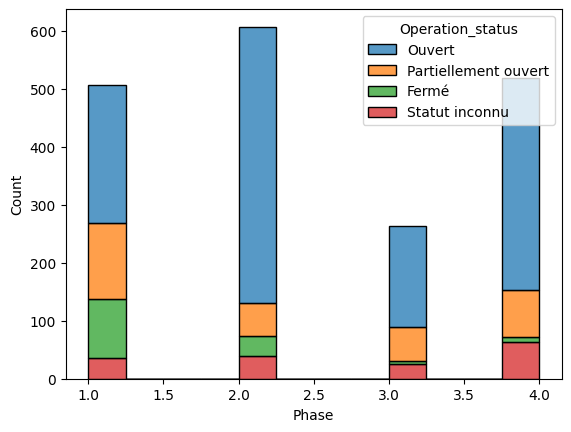

In [169]:
sns.histplot(df_with_loc, x='Phase', hue='Operation_status', multiple='stack')